<a href="https://colab.research.google.com/github/darynabozhok/ML_course/blob/main/DB_HW_2_1_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

medical_df = pd.read_csv("/content/drive/MyDrive/Machine_Learning/medical-charges.csv") # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [ ]:
non_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


**Метод МНК**

In [ ]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [ ]:
X = non_smoker_df['age']
y = non_smoker_df['charges']

In [ ]:
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
X[:3], X_with_intercept[:3]

(1    18
 2    28
 3    33
 Name: age, dtype: int64,
 array([[ 1., 18.],
        [ 1., 28.],
        [ 1., 33.]]))

In [ ]:
MNK_coefs = normal_equations(X_with_intercept, y)
MNK_coefs

array([-2091.42055657,   267.24891283])

In [ ]:
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)
predictions_MNK[:5], y[:5]

(array([2719.0598744 , 5391.54900271, 6727.79356686, 6460.54465403,
        6193.2957412 ]),
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 5     3756.62160
 Name: charges, dtype: float64)

In [ ]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
RMSE_MNK = rmse(y, predictions_MNK)

print(f"MNK coefficients: {MNK_coefs}")
print(f"Predictions MNK: {predictions_MNK}")
print(f"RMSE MNK: {RMSE_MNK:.2f}")

MNK coefficients: [-2091.42055657   267.24891283]
Predictions MNK: [2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]
RMSE MNK: 4662.51


In [ ]:

r2 = r2_score(y, predictions_MNK)
rmse_mnk = np.sqrt(mean_squared_error(y, predictions_MNK))
mae = mean_absolute_error(y, predictions_MNK)

print(f"R² score: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse_mnk:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")


R² score: 0.39
Root Mean Squared Error: 4662.51
Mean Absolute Error: 2580.52


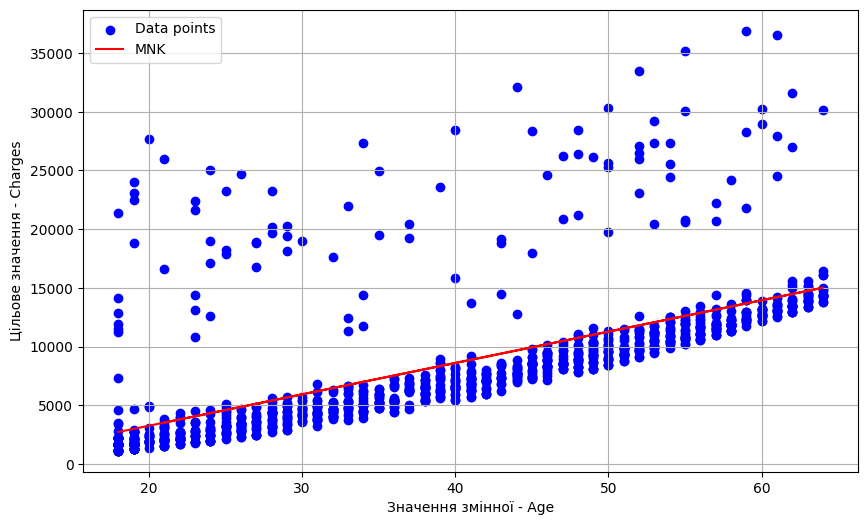

In [ ]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.xlabel('Значення змінної - Age')
plt.ylabel('Цільове значення - Charges')
plt.legend()
plt.grid(True)
plt.show()

**Full-Batch градієнтний спуск**

In [ ]:
X = np.expand_dims(non_smoker_df['age'].values, axis=1)

In [ ]:
# Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors



In [ ]:
m, b, errors = full_batch_gradient_descent(X, y, lr=0.000001, epochs=6000)
predictions_fbgd1 = m * X[:, 0] + b

m, b

(220.1118812402309, 2.10832068386244)

In [ ]:
predictions_fbgd1

array([3964.12218301, 6165.24099541, 7265.80040161, ..., 3964.12218301,
       3964.12218301, 4624.45782673])

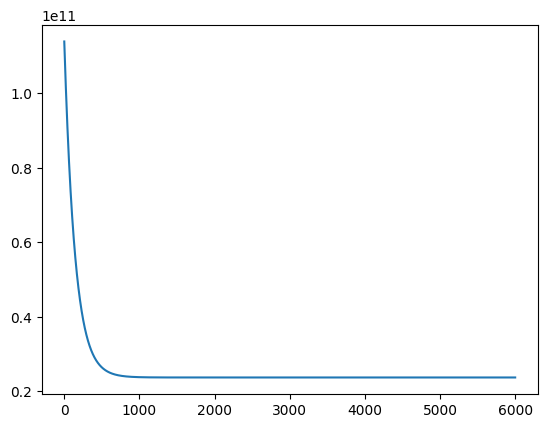

In [ ]:
plt.plot(errors);

In [ ]:
m, b, errors = full_batch_gradient_descent(X, y, lr=0.000001, epochs=10000)
predictions_fbgd2 = m * X[:, 0] + b

m, b

(220.15455540263423, 0.21301135385474854)

In [ ]:
predictions_fbgd2

array([3962.9950086 , 6164.54056263, 7265.31333964, ..., 3962.9950086 ,
       3962.9950086 , 4623.45867481])

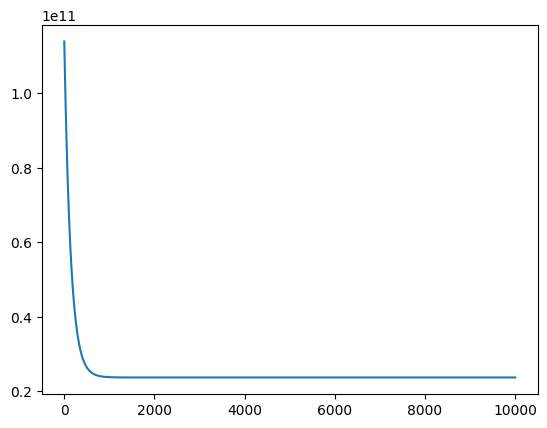

In [ ]:
plt.plot(errors);

In [ ]:
m, b, errors = full_batch_gradient_descent(X, y, lr=0.00001, epochs=10000)
predictions_fbgd3 = m * X[:, 0] + b

m, b

(221.10457373276387, -41.980795673907885)

In [ ]:
predictions_fbgd3

array([3937.90153152, 6148.94726884, 7254.47013751, ..., 3937.90153152,
       3937.90153152, 4601.21525271])

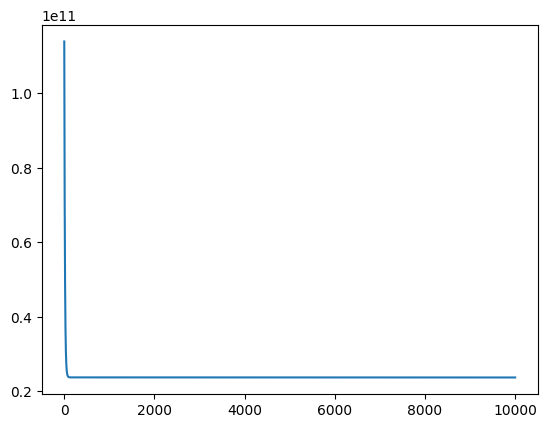

In [ ]:
plt.plot(errors);

In [ ]:
rmse_fbgd1 = np.sqrt(mean_squared_error(y, predictions_fbgd1))
print('RMSE градієнтного спуску варіант 1: ', rmse_fbgd1)

rmse_fbgd2 = np.sqrt(mean_squared_error(y, predictions_fbgd2))
print('RMSE градієнтного спуску варіант 2: ', rmse_fbgd2)

rmse_fbgd3 = np.sqrt(mean_squared_error(y, predictions_fbgd3))
print('RMSE градієнтного спуску варіант 3: ', rmse_fbgd3)

RMSE градієнтного спуску варіант 1:  4715.445023845803
RMSE градієнтного спуску варіант 2:  4715.3497503703065
RMSE градієнтного спуску варіант 3:  4713.2506061057


**scikit-learn.LinearRegression**

In [ ]:
X_frame = non_smoker_df['age'].to_frame()
y = non_smoker_df['charges'].values

lin_reg = LinearRegression()
lin_reg.fit(X_frame, y)
print("Коефіцієнти моделі лінійної регресії:", lin_reg.coef_, ",", lin_reg.intercept_)

Коефіцієнти моделі лінійної регресії: [267.24891283] , -2091.4205565650864


In [ ]:
predictions_sklearn = lin_reg.predict(X_frame)
predictions_sklearn

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
rmse_sklearn = np.sqrt(mean_squared_error(y, predictions_sklearn))
print(f"Root Mean Squared Error sklearn: {rmse_sklearn:.2f}")

Root Mean Squared Error sklearn: 4662.51


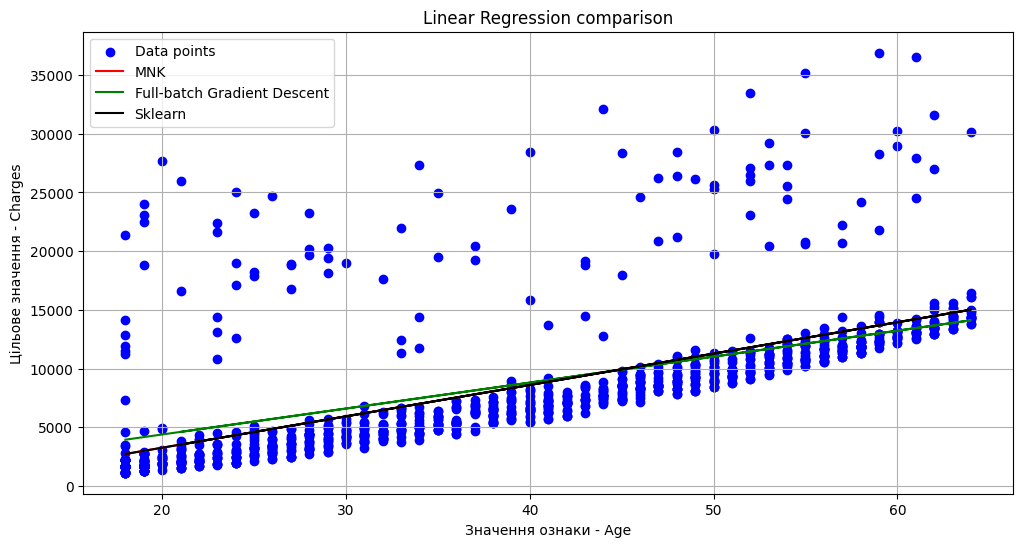

Root Mean Squared Error MNK: 4662.51
Root Mean Squared Error fbgd: 4713.25
Root Mean Squared Error sklearn: 4662.51


In [ ]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.plot(X, predictions_fbgd3, color='green', label='Full-batch Gradient Descent')
plt.plot(X, predictions_sklearn, color='black', label='Sklearn')
plt.title('Linear Regression comparison')
plt.xlabel('Значення ознаки - Age')
plt.ylabel('Цільове значення - Charges')
plt.legend()
plt.grid(True)
plt.show()



print(f"Root Mean Squared Error MNK: {rmse_mnk:.2f}")
print(f"Root Mean Squared Error fbgd: {rmse_fbgd3:.2f}")
print(f"Root Mean Squared Error sklearn: {rmse_sklearn:.2f}")


Як бачимо метод МНК дає кращий результат в даному випадку ніж градієнтний спуск, крім того бачимо, що RMSE для МНК така сама як і при використанні scikit-learn, тобто RMSE_МНК = RMSE_sklearn = 4662.51 (це пояснюється тим, що scikit-learn використовує саме метод найменших квадратів). Найкраще значення RMSE при передбачення було 4709.81, що гірше ніж ми отримали за допомогою МНК, але краще ніж отримано при використанні градієнтного спуску.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [ ]:
smoker_df = medical_df[medical_df.smoker == 'yes']

X_smoker = smoker_df['age'].to_frame()
y_smoker = smoker_df['charges'].values

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_smoker, y_smoker)
print("Коефіцієнти моделі лінійної регресії:", lin_reg.coef_, ",", lin_reg.intercept_)

Коефіцієнти моделі лінійної регресії: [305.23760211] , 20294.128126915966


In [ ]:
predictions_sklearn_SM_Y = lin_reg.predict(X_smoker)
predictions_sklearn_SM_Y

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

In [ ]:

r2_sklearn_SM_Y = r2_score(y, predictions_sklearn_SM_Y)
rmse_sklearn_SM_Y = np.sqrt(mean_squared_error(y, predictions_sklearn_SM_Y))
mae_sklearn_SM_Y = mean_absolute_error(y, predictions_sklearn_SM_Y)

print(f"R² score: {r2_sklearn_SM_Y:.2f}")
print(f"Root Mean Squared Error: {rmse_sklearn_SM_Y:.2f}")
print(f"Mean Absolute Error: {mae_sklearn_SM_Y:.2f}")

R² score: 0.14
Root Mean Squared Error: 10711.00
Mean Absolute Error: 10097.80


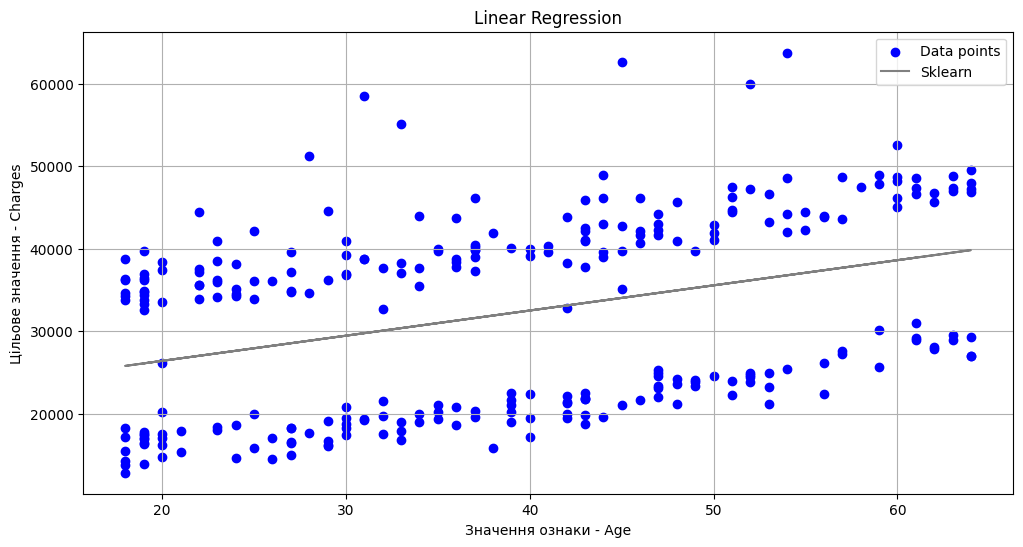

In [ ]:
X_smoker = np.expand_dims(smoker_df['age'].to_numpy(), axis=1)

# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(X_smoker[:, 0], y_smoker, color='blue', label='Data points')
plt.plot(X_smoker[:, 0], predictions_sklearn_SM_Y, color='grey', label='Sklearn')
plt.title('Linear Regression')
plt.xlabel('Значення ознаки - Age')
plt.ylabel('Цільове значення - Charges')
plt.legend()
plt.grid(True)
plt.show()

На жаль, не можна сказати що дана модель - хороша. Бачимо, що оцінки досить погані R² = 0.14, а RMSE = 10711.00. Тому не варто використовувати дану модель для прийнятття рішень в компанії.